In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [42]:
df = pd.read_csv("../DataSets/cars_clus.csv")
df.replace("$null$", 0, inplace=True)
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,0,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [50]:
X = df[["engine_s","horsepow","wheelbas","width","length","curb_wgt","fuel_cap","mpg"]]
X = X.dropna()
X.head()

,engine_s,horsepow,wheelbas,curb_wgt,fuel_cap,mpg
0,1.800,140.000,101.200,2.639,13.200,28.000
1,3.200,225.000,108.100,3.517,17.200,25.000
2,3.200,225.000,106.900,3.470,17.200,26.000
3,3.500,210.000,114.600,3.850,18.000,22.000
4,1.800,150.000,102.600,2.998,16.400,27.000


In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

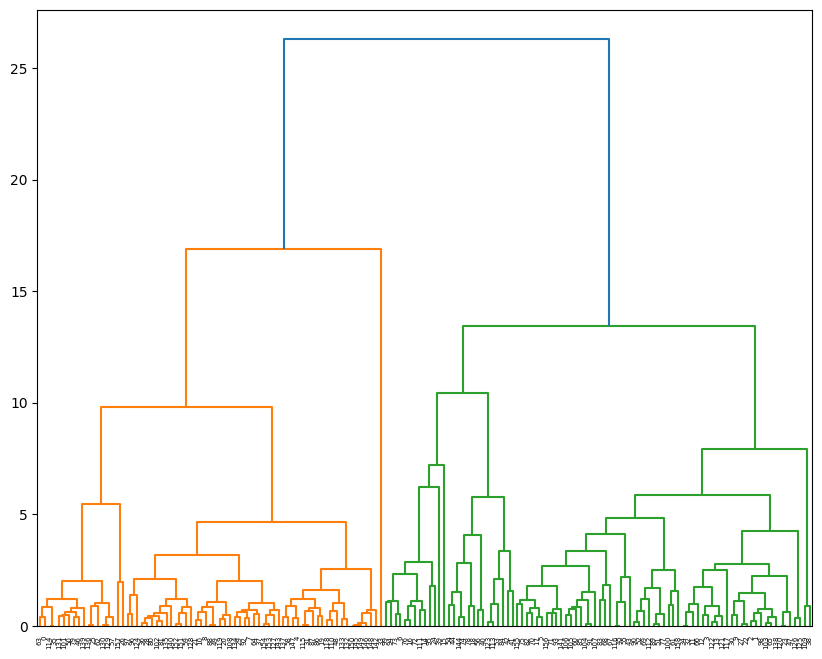

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(10,8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

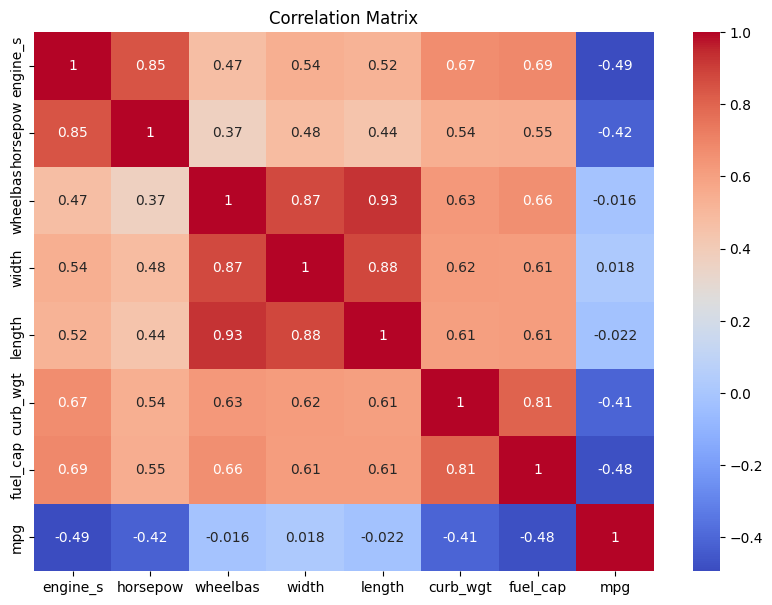

In [62]:
plt.figure(figsize=(10, 7))
sns.heatmap(df[["engine_s","horsepow","wheelbas","width","length","curb_wgt","fuel_cap","mpg"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()